In [1]:
import sys
sys.path.append("/Users/massimilianochella/AstroCosmoComputational/Students/MASSI")

import math
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",})

# Import pyACC logger
from pyACC.helpers import Logger

# Set the logger
print = Logger("pyACC.CosmologicalDistances")

# Import integration class
from pyACC.cosmology.distances import Dc

# Import pandas
#import pandas as pd

# Compute cosmological distances

In this exercise you will keep practicing integration in a cosmological context.
In particular you will compute cosmological distances.

The basis to compute distances is the Hubble function $H(z)$, which describes the evolution of the backgroud.

for flat $\Lambda$ CDM cosmology it reads:

$$ D_c(z) = \int_0^z \frac{\mathrm{d} z' c}{H(z')} $$

Implement this function, or try your favourite cosmological model!

In [2]:
# Implement your favourite Hubble function
def hubble_function(z, omegaM, H0):
    
    return H0* math.sqrt(omegaM*(1+z)**3 +1 -omegaM)

In [3]:
# Now use the function you've implemented to compute cosmological distances
# Use the class you've implemented
get_distances = Dc(hubble_function, 1, 0.3, 72)

In [4]:
# Comoving distance at z=1
print(get_distances, "Mpc")

2024-03-06 15:32:50.748980 :: pyACC.CosmologicalDistances  :: 3214.279485190788 Mpc


In [5]:
# array of redshifts
z_list = np.linspace(0.01, 10, 1000)

# Calculate the comoving distance at each redshift in z_list
# Calculate the angular diameter distance at each redshift in z_list
# Calculate the luminosity distance at each redshift in z_list

comoving_distance = []
angular_diameter_distance = []
luminosity_distance = []

for i in z_list:
    t = Dc(hubble_function, i, 0.3, 72)
    comoving_distance.append(t)
    angular_diameter_distance.append(t/(i+1))
    luminosity_distance.append(t*(1+i))


# Calculate the distance modulus at each redshift in z_list
distance_modulus = []

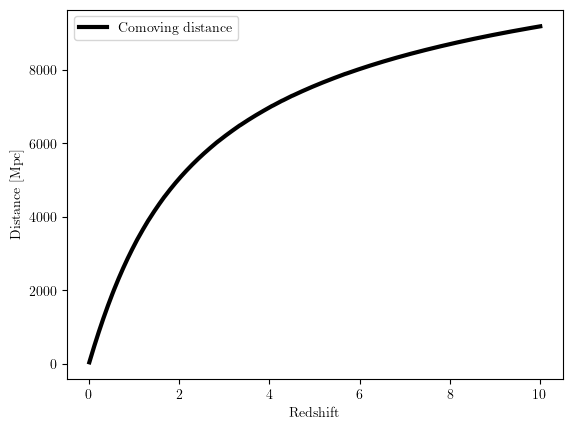

In [6]:
plt.plot(z_list, comoving_distance, lw=3, color="k", label="Comoving distance")

plt.legend()
plt.xlabel("Redshift")
plt.ylabel("Distance [Mpc]");

ValueError: x and y must have same first dimension, but have shapes (1000,) and (0,)

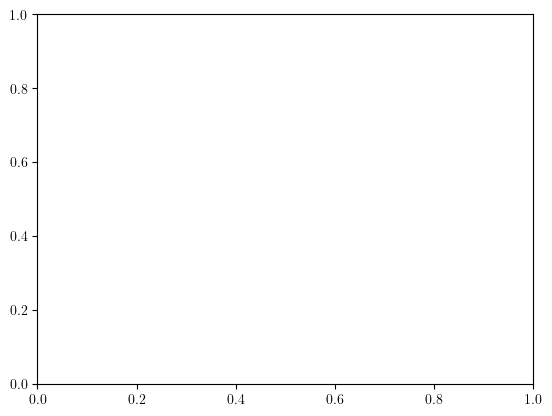

In [7]:
plt.plot(z_list, distance_modulus, lw=3, color="k", label="Distance modulus")
plt.legend()
plt.xlabel("Redshift")
plt.ylabel("$\mu$ [mag]");

## Compare against experimental data


Let's plot the SNIa distance moduli from Pantheon+ analysis against your favourite cosmological model.

Check out the [paper](https://arxiv.org/abs/2112.03863). 
Data are stored [here](https://github.com/PantheonPlusSH0ES/PantheonPlusSH0ES.github.io).
Try to understand which table you should use for the plot.

In [ ]:
# Read the data from Pantheon+ set. 
# Suggestion #1: pandas
# Suggestion #2: read the documentation to understand which column you should pick

In [ ]:
plt.plot(z_list, distance_modulus, lw=2, color="k", label="LCDM - Distance modulus", zorder=1000)
plt.errorbar(.., ..., ..., fmt="o", color="0.5", alpha=0.5, label="Pantheon+")

plt.grid(True, color="0.9", ls="--")
plt.legend(loc="lower right")
plt.xlabel("Redshift")
plt.ylabel("$\mu$ [mag]")